# Final Project - Interconnect (Forecast Churn of Clients)

## Introduction

Interconnect, a telecom operator would like to be able to forecast their churn of clients. If it’s discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect’s marketing team has collected some of their clientele’s personal data, including information about their plans and contracts. These personal data, along with their plans and contracts is used to train a model that will predict whether a client will leave or not.

To do this project, all data is combined together first, then preprocessed to ensure its valid and usable for training a model. Various classification algorithms such as Decision Tree Classifier, CatBoost Classifier, and LightGBM Classifier will be used. The criteria for a passing threshold is a AUC-ROC score of 0.75 or above.

## Preprocessing Data

In [112]:
# Import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score


In [113]:
# Load Data

df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [114]:
df_contract.sample(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3931,8851-RAGOV,2018-01-01,No,Month-to-month,Yes,Mailed check,71.05,1837.7
2314,8197-BFWVU,2014-02-01,No,Two year,Yes,Bank transfer (automatic),93.25,6688.95
5127,8199-ZLLSA,2014-03-01,2019-10-01 00:00:00,One year,Yes,Bank transfer (automatic),118.35,7804.15
2731,1110-KYLGQ,2014-11-01,No,Month-to-month,No,Credit card (automatic),108.25,6780.1
4163,9253-VIFJQ,2014-09-01,No,One year,No,Credit card (automatic),67.05,4309.55
3940,1559-DTODC,2018-07-01,No,Month-to-month,Yes,Bank transfer (automatic),25.15,468.35
6560,9801-NOSHQ,2018-03-01,No,One year,No,Mailed check,19.80,465.45
5863,7969-AULMZ,2018-03-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,97.35,2119.5
456,5149-CUZUJ,2017-10-01,No,One year,No,Bank transfer (automatic),92.90,2768.35
5095,7269-JISCY,2015-07-01,No,One year,No,Bank transfer (automatic),45.05,2462.6


In [115]:
df_personal.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
3625,1591-XWLGB,Female,0,Yes,No
4932,5566-SOEZD,Male,0,Yes,Yes
1447,2951-QOQTK,Male,0,No,Yes
4433,4749-OJKQU,Female,0,No,No
3758,8885-QSQBX,Female,0,No,No
5659,0674-GCDXG,Male,0,No,No
989,3280-NMUVX,Male,0,Yes,Yes
3083,1599-EAHXY,Male,0,Yes,Yes
3941,4797-MIWUM,Male,0,Yes,Yes
1005,2858-EIMXH,Female,1,Yes,No


In [116]:
df_internet.sample(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
224,4130-MZLCC,DSL,No,Yes,No,No,No,No
1134,7077-XJMET,DSL,No,No,Yes,Yes,Yes,Yes
4312,7139-JZFVG,DSL,Yes,Yes,Yes,No,No,No
3140,3657-COGMW,Fiber optic,Yes,Yes,Yes,No,Yes,Yes
103,4622-YNKIJ,Fiber optic,Yes,No,No,Yes,Yes,No
2045,1550-EENBN,Fiber optic,Yes,Yes,No,No,Yes,Yes
331,0334-GDDSO,Fiber optic,No,Yes,No,No,No,No
2445,9754-CLVZW,DSL,Yes,Yes,No,Yes,No,No
61,7410-OIEDU,Fiber optic,Yes,No,Yes,No,No,No
642,3174-AKMAS,DSL,No,Yes,No,Yes,Yes,No


In [117]:
df_phone.sample(10)

,customerID,MultipleLines
1811,4373-MAVJG,Yes
5658,4759-PXTAN,Yes
3960,5018-GWURO,Yes
2611,2004-OCQXK,No
5234,1183-CANVH,No
3626,6242-FEGFD,Yes
2325,7175-NTIXE,No
2288,8735-SDUFN,Yes
3468,3620-MWJNE,No
3102,5294-DMSFH,No


In [118]:
# Check for missing values

print(df_contract.isna().sum())
print(df_personal.isna().sum())
print(df_internet.isna().sum())
print(df_phone.isna().sum())

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64
customerID       0
MultipleLines    0
dtype: int64


In [119]:
# Check for duplicate values

print(df_contract.duplicated().sum())
print(df_personal.duplicated().sum())
print(df_internet.duplicated().sum())
print(df_phone.duplicated().sum())

0
0
0
0


In [120]:
# Merge all dataframes together

df = df_contract.merge(df_personal, on='customerID')
df = df.merge(df_internet, on='customerID', how='outer')
df = df.merge(df_phone, on='customerID', how='outer')
df = df.fillna('NotApplicable')
df.sample(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
1487,5035-PGZXH,2015-06-01,No,One year,Yes,Electronic check,106.80,5914.4,Female,0,No,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
3042,1322-AGOQM,2016-02-01,2019-12-01 00:00:00,Month-to-month,No,Bank transfer (automatic),30.30,1380.1,Male,0,No,No,DSL,No,Yes,No,No,No,No,NotApplicable
5300,8821-XNHVZ,2019-12-01,2020-01-01 00:00:00,Month-to-month,Yes,Mailed check,80.05,80.05,Female,0,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,No
1751,9436-ZBZCT,2018-08-01,2019-10-01 00:00:00,Month-to-month,Yes,Electronic check,89.95,1178.4,Male,0,No,No,Fiber optic,No,No,No,Yes,Yes,No,Yes
5675,4983-CCWMC,2019-11-01,No,Month-to-month,Yes,Mailed check,69.60,207.4,Male,0,No,No,Fiber optic,No,No,No,No,No,No,No
57,5067-XJQFU,2014-08-01,No,One year,Yes,Electronic check,108.45,7076.35,Male,1,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Yes
3381,8879-ZKJOF,2016-09-01,No,One year,Yes,Bank transfer (automatic),79.85,3320.75,Female,0,No,No,DSL,Yes,No,Yes,Yes,Yes,Yes,No
6412,6519-ZHPXP,2014-02-01,No,Two year,Yes,Bank transfer (automatic),108.30,7679.65,Female,0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,No
2114,7707-PYBBH,2016-10-01,No,Month-to-month,Yes,Mailed check,61.90,2647.1,Male,0,No,No,DSL,Yes,Yes,No,Yes,No,No,No
5529,5919-VCZYM,2019-12-01,No,Month-to-month,No,Mailed check,20.05,42.7,Male,0,No,No,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No


In [121]:
# Create a new classification variable for churn from the 'EndDate' - that will be the target variable

df['churn'] = df.apply(lambda x: 1 if x['EndDate'] == 'No' else 0, axis=1)
df.sample(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,churn
6086,0916-KNFAJ,2015-01-01,No,Two year,Yes,Mailed check,69.90,4226.7,Male,0,...,No,DSL,Yes,No,Yes,No,No,Yes,Yes,1
4145,8474-UMLNT,2019-01-01,No,Month-to-month,No,Bank transfer (automatic),67.80,842.25,Female,0,...,No,DSL,Yes,Yes,No,Yes,No,Yes,No,1
1493,6416-YJTTB,2019-03-01,No,Month-to-month,Yes,Bank transfer (automatic),79.50,795.65,Male,0,...,No,Fiber optic,Yes,No,Yes,No,No,No,No,1
3300,1403-LKLIK,2017-05-01,No,One year,No,Mailed check,20.10,579.4,Female,0,...,Yes,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,1
1531,7107-UBYKY,2017-03-01,No,Month-to-month,Yes,Electronic check,25.75,882.55,Female,0,...,Yes,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,Yes,1
3865,5701-SVCWR,2020-01-01,No,Month-to-month,No,Mailed check,24.00,24,Female,0,...,Yes,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,Yes,1
1448,2958-NHPPS,2018-03-01,No,Month-to-month,No,Electronic check,20.85,473.9,Male,0,...,No,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,No,1
2812,3763-GCZHZ,2014-07-01,2020-01-01 00:00:00,One year,Yes,Electronic check,104.05,6890,Male,0,...,No,Fiber optic,No,Yes,No,Yes,Yes,Yes,Yes,0
2117,4139-DETXS,2014-02-01,No,Two year,No,Bank transfer (automatic),64.45,4528,Female,0,...,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,NotApplicable,1
3119,5307-DZCVC,2017-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Credit card (automatic),85.95,2628.6,Female,1,...,No,Fiber optic,No,No,No,No,Yes,No,Yes,0


In [122]:
# Check data types

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   7043 non-null   object 
 13  OnlineSecurity    7043 non-null   object 
 14  OnlineBackup      7043 non-null   object 
 15  DeviceProtection  7043 non-null   object 
 16  TechSupport       7043 non-null   object 


Total Charges should be a float, not an object data type.

In [123]:
# Check for any empty strings in Total Charges and make it equal to MonthlyCharges if needed

print(len(df[df['TotalCharges'] == ' ']))

df['TotalCharges'] = df.apply(lambda x: x['MonthlyCharges']  if x['TotalCharges'] == ' ' else x['TotalCharges'], axis=1)


11


In [124]:
# Fix data types - Total Charges should be a float

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

## Exploratory Data Analysis (EDA)

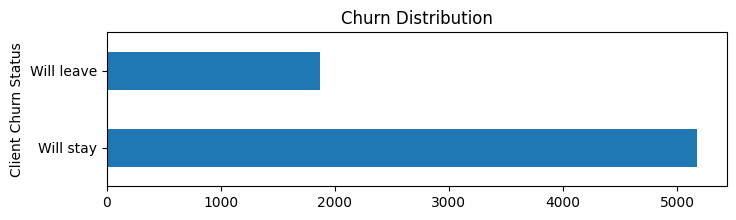

In [125]:
# Check for class imbalance - distribution of churn

df['churn'].map({1: 'Will stay', 0: 'Will leave'}).value_counts().plot(kind='barh',
                                                                      xlabel = 'Client Churn Status',
                                                                      ylabel = 'Frequency',
                                                                      title = 'Churn Distribution',
                                                                      figsize = [8,2])
plt.show()


There seems to be a class imbalance, there is a lot more customers that will stay with Interconnect than those with an EndDate, so data will need to be scaled to get a better result.

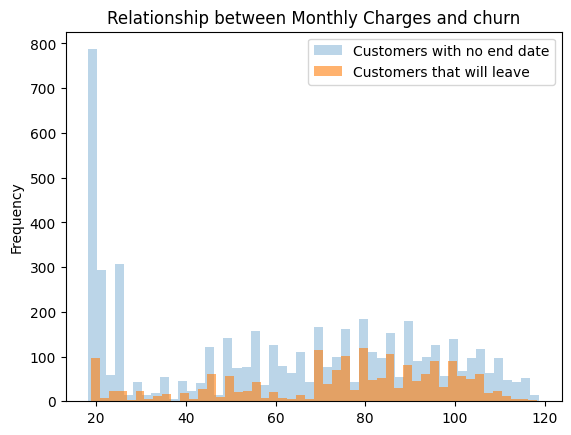

In [126]:
# Relationship between monthly charges and churn

df['MonthlyCharges'][df['churn']==1].plot(kind = 'hist', bins = 50, alpha=0.3)
df['MonthlyCharges'][df['churn']==0].plot(kind = 'hist', bins = 50, alpha=0.6)
plt.title('Relationship between Monthly Charges and churn')
plt.legend(['Customers with no end date', 'Customers that will leave'])
plt.show()

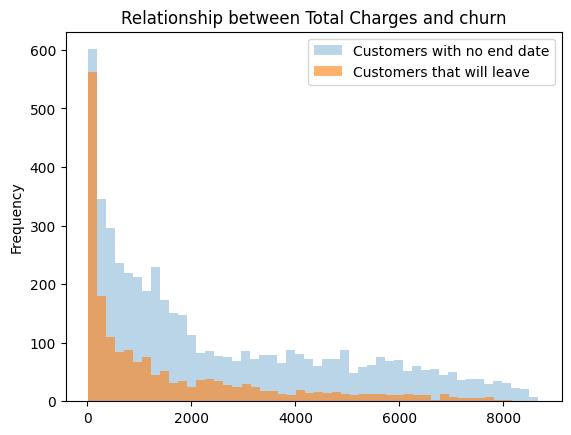

In [127]:
# Relationship between total charges and churn

df['TotalCharges'][df['churn']==1].plot(kind = 'hist', bins = 50, alpha=0.3)
df['TotalCharges'][df['churn']==0].plot(kind = 'hist', bins = 50, alpha=0.6)
plt.title('Relationship between Total Charges and churn')
plt.legend(['Customers with no end date', 'Customers that will leave'])
plt.show()

Based on the above two graphs it seems like customers who spend more with the company end up staying, compared to the customers who spend lesser they have an end date and have left the company.

   gender  CustomersLeft  ActiveCustomers
0  Female            939             2549
1    Male            930             2625


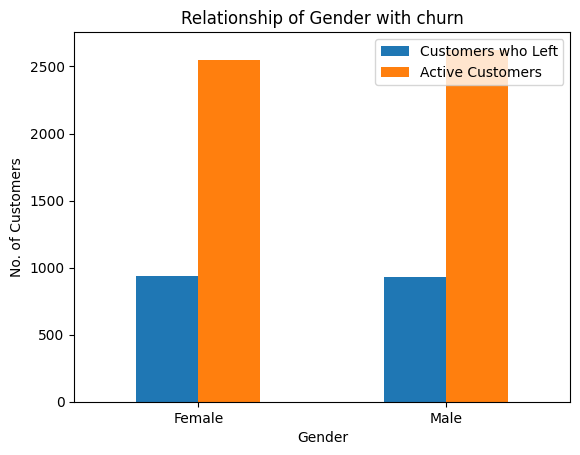

In [128]:
# Relationship between gender and churn

gender_churn = df.pivot_table(index='gender', columns='churn', aggfunc='size', fill_value=0)
gender_churn.columns = ['CustomersLeft', 'ActiveCustomers']
gender_churn = gender_churn.reset_index()
print(gender_churn)


gender_churn.plot(kind = 'bar',
                x = 'gender',
                y = ['CustomersLeft', 'ActiveCustomers'],
                title = 'Relationship of Gender with churn',
                xlabel = 'Gender',
                ylabel = 'No. of Customers')
plt.legend(['Customers who Left', 'Active Customers'])
plt.xticks(rotation=0)
plt.show()


There's hardly any difference between the churn rate between males and females. Gender does not seem to have much of an effect on whether the client would stay or leave.

  InternetService  CustomersLeft  ActiveCustomers
0             DSL            459             1962
1     Fiber optic           1297             1799
2   NotApplicable            113             1413


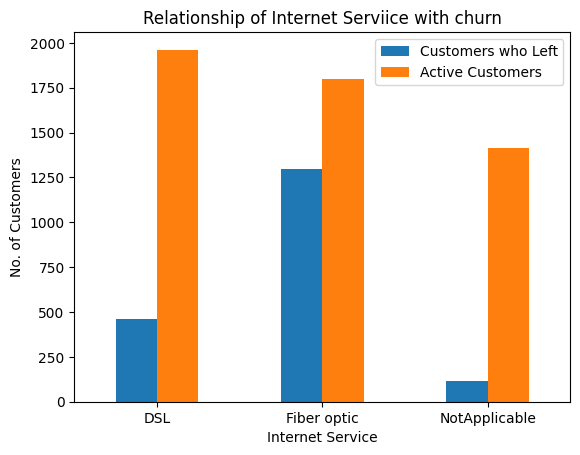

In [129]:
# Relationship between type of internet service and churn

internetservice_churn = df.pivot_table(index='InternetService', columns='churn', aggfunc='size', fill_value=0)
internetservice_churn.columns = ['CustomersLeft', 'ActiveCustomers']
internetservice_churn = internetservice_churn.reset_index()
print(internetservice_churn)

internetservice_churn.plot(kind = 'bar',
                x = 'InternetService',
                y = ['CustomersLeft', 'ActiveCustomers'],
                title = 'Relationship of Internet Serviice with churn',
                xlabel = 'Internet Service',
                ylabel = 'No. of Customers')
plt.legend(['Customers who Left', 'Active Customers'])
plt.xticks(rotation=0)
plt.show()


Its hard to see a direct relationship here, but it seems like more customers with DSL will stay with the company, whereas a good portion of customers who left had Fiber Optic as their Internet Service.

               PaymentMethod  CustomersLeft  ActiveCustomers
0  Bank transfer (automatic)            258             1286
1    Credit card (automatic)            232             1290
2           Electronic check           1071             1294
3               Mailed check            308             1304


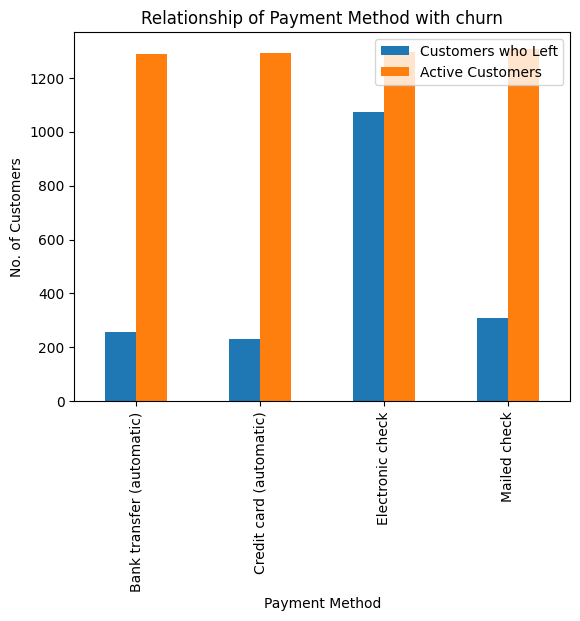

In [167]:
# Relationship between payment method and churn

paymentmethod_churn = df.pivot_table(index='PaymentMethod', columns='churn', aggfunc='size', fill_value=0)
paymentmethod_churn.columns = ['CustomersLeft', 'ActiveCustomers']
paymentmethod_churn = paymentmethod_churn.reset_index()
print(paymentmethod_churn)

paymentmethod_churn.plot(kind = 'bar',
                x = 'PaymentMethod',
                y = ['CustomersLeft', 'ActiveCustomers'],
                title = 'Relationship of Payment Method with churn',
                xlabel = 'Payment Method',
                ylabel = 'No. of Customers')
plt.legend(['Customers who Left', 'Active Customers'])
# plt.xticks(rotation=45)
plt.show()

This shows that there was a high percentage of clients who left that used to pay though Electronic checks. The ratios for the other payment methods seem similar.

## Train Models

In [130]:
# Separate features and target

features = df.drop(['customerID', 'BeginDate', 'EndDate', 'churn'], axis=1)
target = df['churn']

In [131]:
# Check cardinality of different categorical features

print(features.select_dtypes(include='object').nunique())

Type                3
PaperlessBilling    2
PaymentMethod       4
gender              2
Partner             2
Dependents          2
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
MultipleLines       3
dtype: int64


In [132]:
# One Hot Encoding for all categorical features

print(features.info())

features_ohe = pd.get_dummies(features, drop_first=True)
features_ohe.sample(10)


# # Create the encoder
# encoder = OneHotEncoder()

# # Fit and transform the data
# encoded_data = encoder.fit_transform(features)

# # Create a new dataframe from the encoded data
# encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['color']))

# # Join the encoded dataframe with the original dataframe
# df = df.join(encoded_df)

# print(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   gender            7043 non-null   object 
 6   SeniorCitizen     7043 non-null   int64  
 7   Partner           7043 non-null   object 
 8   Dependents        7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  MultipleLines     7043 non-null   object 


,MonthlyCharges,TotalCharges,SeniorCitizen,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,...,DeviceProtection_NotApplicable,DeviceProtection_Yes,TechSupport_NotApplicable,TechSupport_Yes,StreamingTV_NotApplicable,StreamingTV_Yes,StreamingMovies_NotApplicable,StreamingMovies_Yes,MultipleLines_NotApplicable,MultipleLines_Yes
4141,39.85,1434.60,1,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4041,60.75,2893.40,0,0,1,1,0,0,0,1,...,0,1,0,1,0,1,0,1,1,0
1801,69.70,1490.40,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6657,20.45,900.90,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
3490,51.05,415.05,0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1427,73.85,3122.40,1,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4933,57.20,223.75,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,1,0
6973,94.00,4871.45,1,1,0,1,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
1884,55.45,1477.65,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3872,103.10,970.45,0,0,0,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0


In [133]:
# Split Data into training (60%), validating (20%), and testing (20%) set

features_train, features_validtest, target_train, target_validtest = train_test_split(
    features_ohe, target, test_size=0.4, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_validtest, target_validtest, test_size=0.5, random_state=12345)

In [134]:
# # Scale the features

# scaler = StandardScaler()
# scaler.fit(features_train)
# features_train = scaler.transform(features_train)
# features_valid = scaler.transform(features_valid)
# features_test = scaler.transform(features_test)


### Decision Tree Classifier

In [139]:
# Train Decision Tree Classifier

model_dt = DecisionTreeClassifier(random_state=12345)
model_dt.fit(features_train, target_train)


DecisionTreeClassifier(random_state=12345)

Decision Tree Classifier - ROC AUC: 0.66
Accuracy: 0.74


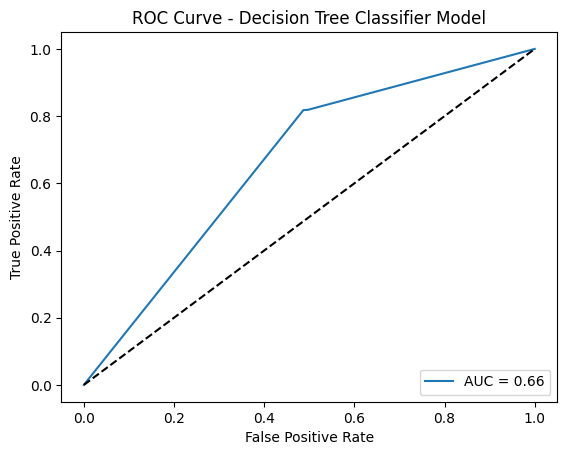

In [140]:
# Calculate AUC-ROC score for Decision Tree Classifier on validation set

predict_prob_dt = model_dt.predict_proba(features_valid)[:, 1]
roc_auc_dt = roc_auc_score(target_valid, predict_prob_dt)
print("Decision Tree Classifier - ROC AUC:", round(roc_auc_dt, 2))

# Calculate Accuracy on validation set
prediction_dt = model_dt.predict(features_valid)
accuracy_dt = accuracy_score(target_valid, prediction_dt)
print("Accuracy:", round(accuracy_dt, 2))

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(target_valid, predict_prob_dt)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_dt:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier Model')
plt.legend(loc='lower right')
plt.show()



### Random Forest Classifier

In [141]:
# Train Random Forest Classifier

model_rf = RandomForestClassifier(random_state=12345)
model_rf.fit(features_train, target_train)



RandomForestClassifier(random_state=12345)

Random Forest Classifier - ROC AUC: 0.83
Accuracy: 0.8


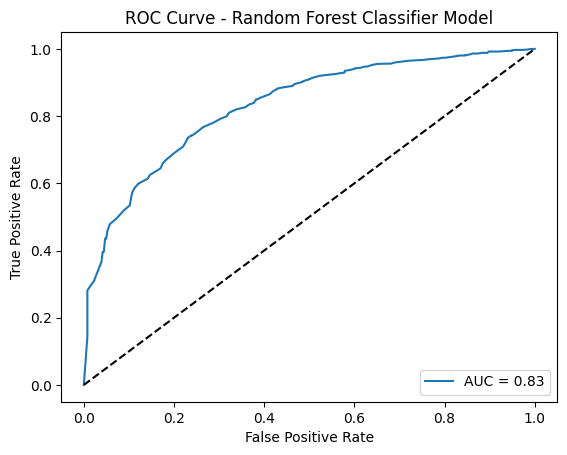

In [142]:
# Calculate AUC-ROC score for Random Forest Classifier on validation set

predict_prob_rf = model_rf.predict_proba(features_valid)[:, 1]
roc_auc_rf = roc_auc_score(target_valid, predict_prob_rf)
print("Random Forest Classifier - ROC AUC:", round(roc_auc_rf, 2))

# Calculate Accuracy on validation set
prediction_rf = model_rf.predict(features_valid)
accuracy_rf = accuracy_score(target_valid, prediction_rf)
print("Accuracy:", round(accuracy_rf, 2))

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(target_valid, predict_prob_rf)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier Model')
plt.legend(loc='lower right')
plt.show()



### CatBoost Classifier

In [143]:
# Train CatBoost Classifier

model_cb = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_seed=12345)   
model_cb.fit(features_train, target_train, verbose=10)

0:	learn: 0.6263658	total: 2.61ms	remaining: 259ms
10:	learn: 0.4335066	total: 21.3ms	remaining: 172ms
20:	learn: 0.3959621	total: 40.7ms	remaining: 153ms
30:	learn: 0.3827073	total: 58.9ms	remaining: 131ms
40:	learn: 0.3721867	total: 78.2ms	remaining: 113ms
50:	learn: 0.3657698	total: 97.5ms	remaining: 93.7ms
60:	learn: 0.3591999	total: 117ms	remaining: 74.5ms
70:	learn: 0.3531134	total: 136ms	remaining: 55.6ms
80:	learn: 0.3465287	total: 156ms	remaining: 36.6ms
90:	learn: 0.3410994	total: 175ms	remaining: 17.3ms
99:	learn: 0.3340136	total: 193ms	remaining: 0us


CatBoost Classifier - ROC AUC: 0.85
Accuracy: 0.8


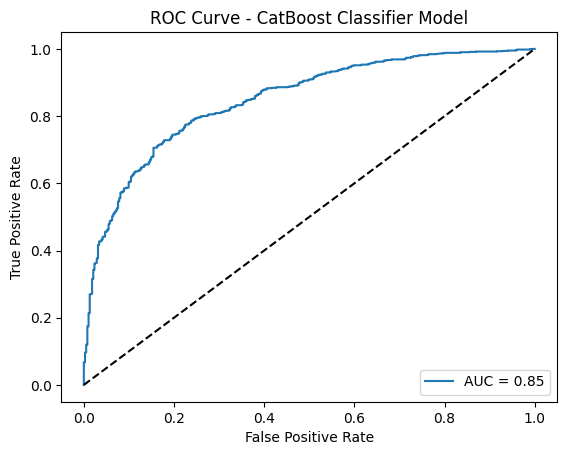

In [144]:
# Calculate AUC-ROC score for CatBoost Classifier on validation set

predict_prob_cb = model_cb.predict_proba(features_valid)[:, 1]
roc_auc_cb = roc_auc_score(target_valid, predict_prob_cb)
print("CatBoost Classifier - ROC AUC:", round(roc_auc_cb, 2))

# Calculate Accuracy on validation set
prediction_cb = model_cb.predict(features_valid)
accuracy_cb = accuracy_score(target_valid, prediction_cb)
print("Accuracy:", round(accuracy_cb, 2))

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(target_valid, predict_prob_cb)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_cb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost Classifier Model')
plt.legend(loc='lower right')
plt.show()


### LightGBM Classifier

In [145]:
# Train LightGBM Classifier model

model_lgb = LGBMClassifier(random_state=12345)
model_lgb.fit(features_train, target_train)

LGBMClassifier(random_state=12345)

LightGBM Classifier - ROC AUC: 0.84
Accuracy: 0.8


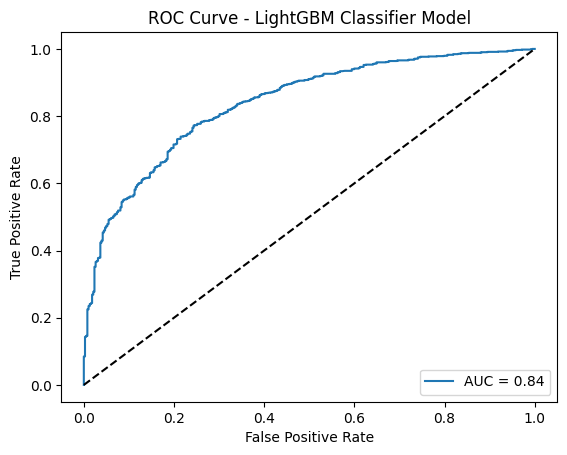

In [146]:
# Calculate AUC-ROC score for LightGBM Classifier on validation set
predict_prob_lgb = model_lgb.predict_proba(features_valid)[:, 1]
roc_auc_lgb = roc_auc_score(target_valid, predict_prob_lgb)
print("LightGBM Classifier - ROC AUC:", round(roc_auc_lgb, 2))

# Calculate Accuracy on validation set
prediction_lgb = model_lgb.predict(features_valid)
accuracy_lgb = accuracy_score(target_valid, prediction_lgb)
print("Accuracy:", round(accuracy_lgb, 2))

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(target_valid, predict_prob_lgb)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_lgb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM Classifier Model')
plt.legend(loc='lower right')
plt.show()

### Gradient Boosting Classifier

In [147]:
# Train Gradient Boosting Classifier model

from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(random_state=12345)
model_gb.fit(features_train, target_train)

GradientBoostingClassifier(random_state=12345)

Gradient Boosting Classifier - ROC AUC: 0.85
Accuracy: 0.79


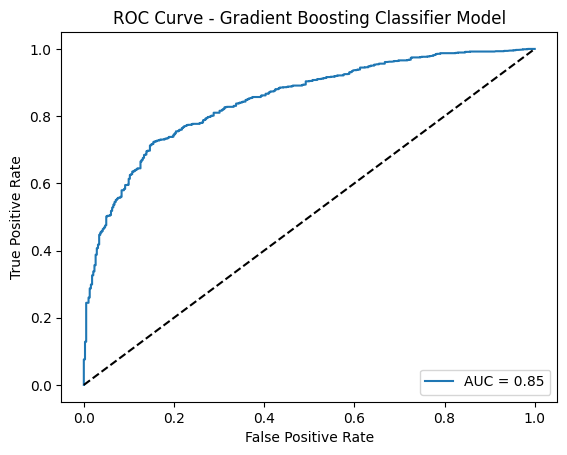

In [148]:
# Calculate AUC-ROC score for Gradient Boosting Classifier on validation set
predict_prob_gb = model_gb.predict_proba(features_valid)[:, 1]
roc_auc_gb = roc_auc_score(target_valid, predict_prob_gb)
print("Gradient Boosting Classifier - ROC AUC:", round(roc_auc_gb, 2))

# Calculate Accuracy on validation set
prediction_gb = model_gb.predict(features_valid)
accuracy_gb = accuracy_score(target_valid, prediction_gb)
print("Accuracy:", round(accuracy_gb, 2))

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(target_valid, predict_prob_gb)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_gb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier Model')
plt.legend(loc='lower right')
plt.show()

## Finetuning Hyperparameters

CatBoost Classifier and Gradient Boosting Classifier gave the best AUC-ROC score of 0.85, and then LightGBM Classifier and Random Forest Classifier gave the AUC-ROC score of 0.84 and 0.83 respectively. While all these (except the Decision Tree Classifier) pass the basic criteria of AUC-ROC score being above 0.75, we will try finetuning hyperparameters to see if this metric can be improved.

### Finetuning Random Forest Classifier

In [158]:
# Random Forest Classifier - Finetune Hyperparameters

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
}

rf_model = RandomForestClassifier()

random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf, 
                                   scoring='roc_auc', n_iter=5, cv=3, verbose=1, random_state=42, n_jobs=-1)

random_search_rf.fit(features_train, target_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [159]:
# Get the best parameters and model
best_params_rf = random_search_rf.best_params_
best_model_rf = random_search_rf.best_estimator_

# Print the best parameters 
print("Best Parameters:", best_params_rf)

# Calculate AUC-ROC score for Random Forest Classifier after finetuning hyperparameters on validation set
predict_prob_rf_finetuned = best_model_rf.predict_proba(features_valid)[:, 1]
roc_auc_rf_finetuned = roc_auc_score(target_valid, predict_prob_rf_finetuned)
print("\nRandom Forest Classifier (after finetuning hyperparameters) - ROC AUC:", round(roc_auc_rf_finetuned, 2))


Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 10}

Random Forest Classifier (after finetuning hyperparameters) - ROC AUC: 0.85


### Finetuning CatBoost Classifier Model

In [151]:
# CatBoost Classifier - Finetune Hyperparameters

# Define a smaller and more focused parameter grid
param_distributions = {
    'iterations': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': np.arange(5, 15, 5)
}

# Initialize the model
model_cb = CatBoostClassifier()

# Perform random search with fewer iterations
random_search_cb = RandomizedSearchCV(estimator=model_cb, param_distributions=param_distributions, 
                                   scoring='roc_auc', n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)

random_search_cb.fit(features_train, target_train, verbose=10)




Fitting 3 folds for each of 10 candidates, totalling 30 fits
0:	learn: 0.6861998	total: 1.92ms	remaining: 190ms
10:	learn: 0.6318376	total: 11.9ms	remaining: 96.5ms
20:	learn: 0.5873232	total: 22.4ms	remaining: 84.3ms
30:	learn: 0.5531344	total: 33.4ms	remaining: 74.4ms
40:	learn: 0.5254429	total: 44.6ms	remaining: 64.2ms
50:	learn: 0.5045997	total: 56.1ms	remaining: 53.9ms
60:	learn: 0.4870319	total: 67.4ms	remaining: 43.1ms
70:	learn: 0.4732682	total: 78.5ms	remaining: 32.1ms
80:	learn: 0.4625521	total: 89.7ms	remaining: 21ms
90:	learn: 0.4533562	total: 100ms	remaining: 9.93ms
99:	learn: 0.4460714	total: 111ms	remaining: 0us
0:	learn: 0.6864679	total: 1.23ms	remaining: 122ms
10:	learn: 0.6309145	total: 11.8ms	remaining: 95.8ms
20:	learn: 0.5899419	total: 22.5ms	remaining: 84.6ms
30:	learn: 0.5536602	total: 33.1ms	remaining: 73.7ms
40:	learn: 0.5277809	total: 43.7ms	remaining: 62.9ms
50:	learn: 0.5084920	total: 54.7ms	remaining: 52.5ms
60:	learn: 0.4920777	total: 65.7ms	remaining: 42m

0:	learn: 0.6239593	total: 1.24ms	remaining: 185ms
10:	learn: 0.4231798	total: 12.4ms	remaining: 156ms
20:	learn: 0.3913072	total: 23.5ms	remaining: 144ms
30:	learn: 0.3754706	total: 34.8ms	remaining: 134ms
40:	learn: 0.3659006	total: 45.8ms	remaining: 122ms
50:	learn: 0.3590196	total: 56.8ms	remaining: 110ms
60:	learn: 0.3512866	total: 67.8ms	remaining: 98.9ms
70:	learn: 0.3445731	total: 78.9ms	remaining: 87.8ms
80:	learn: 0.3386363	total: 90ms	remaining: 76.6ms
90:	learn: 0.3320275	total: 101ms	remaining: 65.5ms
100:	learn: 0.3251619	total: 112ms	remaining: 54.4ms
110:	learn: 0.3195970	total: 123ms	remaining: 43.3ms
120:	learn: 0.3132596	total: 134ms	remaining: 32.2ms
130:	learn: 0.3089607	total: 146ms	remaining: 21.1ms
140:	learn: 0.3041841	total: 157ms	remaining: 10ms
149:	learn: 0.2998813	total: 167ms	remaining: 0us
0:	learn: 0.6861998	total: 1.34ms	remaining: 200ms
10:	learn: 0.6318376	total: 11.5ms	remaining: 145ms
20:	learn: 0.5873232	total: 21.8ms	remaining: 134ms
30:	learn: 0

60:	learn: 0.2820635	total: 980ms	remaining: 2.23s
70:	learn: 0.2686506	total: 1.14s	remaining: 2.08s
80:	learn: 0.2545951	total: 1.32s	remaining: 1.94s
90:	learn: 0.2413437	total: 1.51s	remaining: 1.81s
100:	learn: 0.2326895	total: 1.68s	remaining: 1.64s
110:	learn: 0.2215875	total: 1.85s	remaining: 1.49s
120:	learn: 0.2127830	total: 2.05s	remaining: 1.34s
130:	learn: 0.2032497	total: 2.23s	remaining: 1.17s
140:	learn: 0.1949416	total: 2.42s	remaining: 1.01s
150:	learn: 0.1869289	total: 2.62s	remaining: 851ms
160:	learn: 0.1788857	total: 2.82s	remaining: 683ms
170:	learn: 0.1728469	total: 3.02s	remaining: 511ms
180:	learn: 0.1670266	total: 3.22s	remaining: 338ms
190:	learn: 0.1630857	total: 3.42s	remaining: 161ms
199:	learn: 0.1585388	total: 3.59s	remaining: 0us
0:	learn: 0.6862841	total: 20ms	remaining: 3.98s
10:	learn: 0.6227578	total: 167ms	remaining: 2.87s
20:	learn: 0.5715508	total: 343ms	remaining: 2.92s
30:	learn: 0.5335017	total: 513ms	remaining: 2.8s
40:	learn: 0.5006566	tota

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f16a76d7b20>,
                   n_jobs=-1,
                   param_distributions={'depth': array([ 5, 10]),
                                        'iterations': [100, 150, 200],
                                        'learning_rate': [0.01, 0.05, 0.1]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [153]:
# Get the best parameters and model for CatBoost Classifier model
best_params_cb = random_search_cb.best_params_
best_model_cb = random_search_cb.best_estimator_

# Print the best parameters
print("Best parameters found for CatBoost Classifier: ", best_params_cb)

# Calculate AUC-ROC score for CatBoost Classifier after finetuning hyperparameters on validation set
predict_prob_cb_finetuned = best_model_cb.predict_proba(features_valid)[:, 1]
roc_auc_cb_finetuned = roc_auc_score(target_valid, predict_prob_cb_finetuned)
print("\nCatBoost Classifier (after finetuning hyperparameters) - ROC AUC:", round(roc_auc_cb_finetuned, 2))


Best parameters found for CatBoost Classifier:  {'learning_rate': 0.05, 'iterations': 100, 'depth': 5}

CatBoost Classifier (after finetuning hyperparameters) - ROC AUC: 0.85


### Finetuning LightGBM Classifier Model

In [154]:
# Light GBM Classifier (LGBMClassifier) - Finetune Hyperparameters

# Define a smaller and more focused parameter grid
param_distributions = {
    'num_leaves': np.arange(20, 60, 10),
    'max_depth': np.arange(5, 15, 5),
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

# Initialize the model
model_lgb = LGBMClassifier()

# Perform random search with fewer iterations
random_search_lgbm = RandomizedSearchCV(estimator=model_lgb, param_distributions=param_distributions, 
                                   scoring='roc_auc', n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)

random_search_lgbm.fit(features_train, target_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': array([ 5, 10]),
                                        'n_estimators': [100, 200, 300],
                                        'num_leaves': array([20, 30, 40, 50]),
                                        'subsample': [0.7, 0.8, 0.9]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [155]:
# Get the best parameters and model

best_params_lgbm = random_search_lgbm.best_params_
best_model_lgbm = random_search_lgbm.best_estimator_

# Print the best parameters 
print("Best parameters found for LightGBM Classifier: ", best_params_lgbm)

# Calculate AUC-ROC score for LightGBM Classifier after finetuning hyperparameters on validation set

predict_prob_lgb_finetuned = best_model_lgbm.predict_proba(features_valid)[:, 1]
roc_auc_lgb_finetuned = roc_auc_score(target_valid, predict_prob_lgb_finetuned)
print("\nLightGBM Classifier (after finetuning hyperparameters) - ROC AUC:", round(roc_auc_lgb_finetuned, 2))


Best parameters found for LightGBM Classifier:  {'subsample': 0.7, 'num_leaves': 30, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}

LightGBM Classifier (after finetuning hyperparameters) - ROC AUC: 0.85


### Finetuning Gradient Boosting Classifier Model

In [156]:
# Gradient Boosting Classifier - Finetune Hyperparameters

param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'learning_rate': [0.01, 0.05, 0.1],
}


model_gb_clf = GradientBoostingClassifier()

random_search_gb = RandomizedSearchCV(estimator=model_gb_clf, param_distributions=param_grid_gb, 
                                   scoring='roc_auc', n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)

random_search_gb.fit(features_train, target_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [None, 10],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [157]:
# Get the best parameters and model
best_params_gb = random_search_gb.best_params_
best_model_gb = random_search_gb.best_estimator_

# Print the best parameters 
print("Best Parameters:", best_params_gb)

# Calculate AUC-ROC score for Gradient Boosting Classifier after finetuning hyperparameters on validation set
predict_prob_gb_finetuned = best_model_gb.predict_proba(features_valid)[:, 1]
roc_auc_gb_finetuned = roc_auc_score(target_valid, predict_prob_gb_finetuned)
print("\nGradient Boosting Classifier (after finetuning hyperparameters) - ROC AUC:", round(roc_auc_gb_finetuned, 2))


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10, 'learning_rate': 0.1}

Gradient Boosting Classifier (after finetuning hyperparameters) - ROC AUC: 0.83


## Final Model - LightGBM Classifier

Random Forest Classifier, CatBoost Classifier and LightGBM Classifier all gave an exact ROC-AUC score of 0.85 on the validation set. LightGBM Classifier was chosen only because it was the fastest to finetune the hyperparameters on it.

LightGBM Classifier (after finetuning hyperparameters) - ROC AUC on Test set: 0.83
Accuracy: 0.79


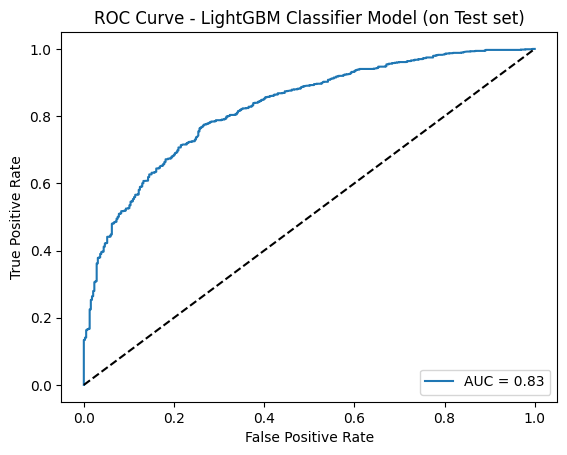

In [163]:
# LightGBM Classifier on Test Set

# Calculate AUC-ROC score for LightGBM Classifier after finetuning hyperparameters on test set
predict_prob_lgb_finetuned_test = best_model_lgbm.predict_proba(features_test)[:, 1]
roc_auc_lgb_finetuned_test = roc_auc_score(target_test, predict_prob_lgb_finetuned_test)
print("LightGBM Classifier (after finetuning hyperparameters) - ROC AUC on Test set:", round(roc_auc_lgb_finetuned_test, 2))

# Calculate Accuracy on test set
prediction_lgb_finetuned_test = best_model_lgbm.predict(features_test)
accuracy_lgb_finetuned_test = accuracy_score(target_test, prediction_lgb_finetuned_test)
print("Accuracy:", round(accuracy_lgb_finetuned_test, 2))

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(target_test, predict_prob_lgb_finetuned_test)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_lgb_finetuned_test:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM Classifier Model (on Test set)')
plt.legend(loc='lower right')
plt.show()

## Conclusion - Report

Interconnect's client data was analyzed and then models were trained based on that to determine if a client is planning to leave. To do this, first all data including clientele’s personal data, information about their plans and contracts were combined and preprocessed. Exploratory Data Analysis was done on this data, which showed that the clients who were active were paying more monthly compared to those who left. There was no direct relation noticed for male vs. female clients in terms of their churn rate, or any relationship to which type of Internet Service they had signed up for.

Various classification algorithms such as Decision Tree Classifier, Random Forest Classifier, CatBoost Classifier, LightGBM Classifier and Gradient Boosting Classifier were used to train models to pick the best one. Initially, CatBoost classifier and Gradient Boosting Classifier gave the best AUC-ROC at 0.85 for the validation set, but upon finetuning hyperparameters, LightGBM also gave a AUC-ROC score of 0.85 on validation set. 

The final model selected was a LightGBM Classifier, testing was done on the test set which gave a AUC-ROC score of 0.83, and an accuracy score of 0.79. It passes our threshold of AUC-ROC score of 0.75.

All the project plan steps were carried out. The only one that was skipped was scaling the data as most of the featurs were categorical and not numerical, so One Hot Encoding was used which does not require scaling the data. One of the difficulties encountered during this project were figuring out data leakage when changing the data type of Total Charges to float, as there were some single space strings there. This was solved by going back and checking for all the single space strings in TotalCharges and updating it with the Monthly Charges. Another difficulty was finetuning hyperparameters of models to get a better AUC-ROC score while also spending only a reasonable time to train those models. RandomizedSearchCV was used to do this efficiently.

Interconnect can now use this data to forecast if a client is planning to leave, then the marketing team can offer them promotional codes and special plan options to entice them to stay.